In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
data = pd.read_csv('spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [6]:
data.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace=True)

In [7]:
ans = {'spam': 0, 'ham':1}

data = data.replace(ans)
data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


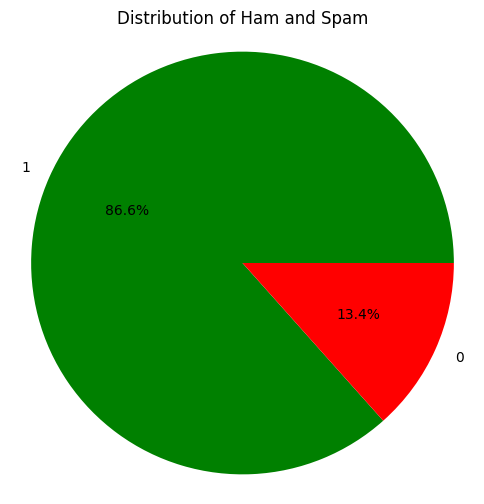

In [8]:
counts = data['Category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Distribution of Ham and Spam')
plt.axis('equal') 
plt.show()

In [9]:
data.shape

(5572, 2)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(5169, 2)

In [12]:
data.sample(10)

,Category,Message
3476,1,I got it before the new year cos yetunde said ...
5526,0,PRIVATE! Your 2003 Account Statement for shows...
410,1,Come by our room at some point so we can iron ...
1591,1,That's my honeymoon outfit. :)
1079,1,Me too watching surya movie only. . .after 6 p...
1418,1,Lmao. Take a pic and send it to me.
5022,1,Anyway holla at me whenever you're around beca...
2782,1,Well at this right I'm gonna have to get up an...
4969,1,We are supposed to meet to discuss abt our tri...
4337,1,Yes when is the appt again?


In [13]:
print("Rows--->",data.shape[0])
print("Columns--->",data.shape[1])

Rows---> 5169
Columns---> 2


In [14]:
data.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [15]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [16]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [17]:
data.isna().mean()

Category    0.0
Message     0.0
dtype: float64

In [18]:
data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [19]:
data.columns=['spam/ham','SMS']

In [20]:
data.loc[data['spam/ham'] == 'spam', 'spam/ham',] = 0
data.loc[data['spam/ham'] == 'ham', 'spam/ham',] = 1

In [21]:
x=data.SMS
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: SMS, Length: 5169, dtype: object

In [22]:
y=data['spam/ham']
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: spam/ham, Length: 5169, dtype: int64

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=3)
print(x.shape)


(5169,)


In [24]:
print(xtrain.shape)

(4135,)


In [25]:
print(xtest.shape)

(1034,)


In [26]:
print(ytrain.shape)

(4135,)


In [27]:
print(ytest.shape)

(1034,)


In [28]:
xtrain,xtest

(4443                       COME BACK TO TAMPA FFFFUUUUUUU
 982     Congrats! 2 mobile 3G Videophones R yours. cal...
 3822    Please protect yourself from e-threats. SIB ne...
 3924       As if i wasn't having enough trouble sleeping.
 4927    Just hopeing that wasnÛ÷t too pissed up to re...
                               ...                        
 806      sure, but make sure he knows we ain't smokin yet
 990                                          26th OF JULY
 1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
 3519    No it will reach by 9 only. She telling she wi...
 1745    IåÕm cool ta luv but v.tired 2 cause i have be...
 Name: SMS, Length: 4135, dtype: object,
 4994    Just looked it up and addie goes back Monday, ...
 4292    You best watch what you say cause I get drunk ...
 4128                 Me i'm not workin. Once i get job...
 4429          Yar lor... How u noe? U used dat route too?
 660     Under the sea, there lays a rock. In the rock,...
               

In [29]:

ytrain,ytest

(4443    1
 982     0
 3822    1
 3924    1
 4927    1
        ..
 806     1
 990     1
 1723    1
 3519    1
 1745    1
 Name: spam/ham, Length: 4135, dtype: int64,
 4994    1
 4292    1
 4128    1
 4429    1
 660     1
        ..
 4003    1
 1107    1
 5413    1
 1413    0
 4998    1
 Name: spam/ham, Length: 1034, dtype: int64)

In [30]:
feat_vect=TfidfVectorizer(stop_words='english',lowercase=True)
feat_vect

TfidfVectorizer(stop_words='english')

In [31]:
ytrain=ytrain.astype('int')
ytest=ytest.astype('int')
xtrain_vec =feat_vect.fit_transform(xtrain)
xtest_vec =feat_vect.transform(xtest)
print(xtrain)

4443                       COME BACK TO TAMPA FFFFUUUUUUU
982     Congrats! 2 mobile 3G Videophones R yours. cal...
3822    Please protect yourself from e-threats. SIB ne...
3924       As if i wasn't having enough trouble sleeping.
4927    Just hopeing that wasnÛ÷t too pissed up to re...
                              ...                        
806      sure, but make sure he knows we ain't smokin yet
990                                          26th OF JULY
1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
3519    No it will reach by 9 only. She telling she wi...
1745    IåÕm cool ta luv but v.tired 2 cause i have be...
Name: SMS, Length: 4135, dtype: object


In [32]:
xtrain_vec
print("xtrain--->",xtrain_vec)
print("xtest---->",xtest_vec)

xtrain--->   (0, 2697)	0.7205755344386542
  (0, 6409)	0.5950532917415522
  (0, 1825)	0.35592482233751443
  (1, 5438)	0.27399320458839144
  (1, 4583)	0.27399320458839144
  (1, 4438)	0.22516921191243092
  (1, 5036)	0.27399320458839144
  (1, 2274)	0.27399320458839144
  (1, 2920)	0.23390504161994488
  (1, 3610)	0.27399320458839144
  (1, 4984)	0.19732502227978832
  (1, 4180)	0.23390504161994488
  (1, 7137)	0.24133495616477563
  (1, 6940)	0.27399320458839144
  (1, 203)	0.27399320458839144
  (1, 6941)	0.27399320458839144
  (1, 453)	0.25698446420786897
  (1, 4333)	0.15929709793058355
  (1, 1885)	0.22516921191243092
  (2, 953)	0.26160275768603725
  (2, 4856)	0.26160275768603725
  (2, 5786)	0.26160275768603725
  (2, 2459)	0.22436535516409714
  (2, 4960)	0.26160275768603725
  (2, 5976)	0.1902832473629628
  :	:
  (4132, 6862)	0.11085392369947865
  (4132, 5612)	0.14854309693836068
  (4132, 3865)	0.16898098428277844
  (4133, 6457)	0.6154177820886059
  (4133, 5320)	0.5530764956488926
  (4133, 2311)	0

In [33]:
model=LogisticRegression()
model.fit(xtrain_vec,ytrain)

LogisticRegression()

In [34]:
model.score(xtrain_vec,ytrain)

0.962273276904474

In [35]:
model.score(xtest_vec,ytest)

0.960348162475822

In [36]:
predict_model=model.predict(xtest_vec)
predict_model

array([1, 1, 1, ..., 1, 0, 1])

In [37]:
accuracy_score(ytest,predict_model)

0.960348162475822

In [38]:
confusion_matrix(ytest,predict_model)

array([[ 99,  41],
       [  0, 894]], dtype=int64)

In [39]:
print(classification_report(ytest,predict_model))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       140
           1       0.96      1.00      0.98       894

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

